<a href="https://colab.research.google.com/github/rodriquiel/NetflixDataAnalysis/blob/main/NetflixData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis, limpieza y transformacion de datos de peliculas y series de Netflix

##Caracteristicas del dataset

Netflix es una de las plataformas de streaming mas populares del mundo. Contiene en su catalogo mas de 8000 peliculas y series disponibles, y cuenta con millones de suscriptores a lo largo de todo el mundo.
El dataset utilizado contiene un listado de todas las peliculas y series disponibles en la plataforma en el año 2021, junto con detalles como: elenco, directores, calificaciones, año de estreno, duración, etc.

##Importacion librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Importacion dataset

* Dataset: https://www.kaggle.com/datasets/shivamb/netflix-shows

In [3]:
from google.colab import drive
drive.mount('/content/drive')
ds = pd.read_csv('/content/drive/MyDrive/Python/netflix_titles.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
ds.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
ds.shape

(8807, 12)

In [6]:
ds.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
ds.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
ds.drop('description', axis = 1, inplace = True)

##Tratamiento de datos Nulos

In [9]:
print("Cantidad de nulos por columna:")
print(ds.isnull().sum())

Cantidad de nulos por columna:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64


Tratamiento Nulls en 'director', 'cast', 'country', 'date_added' y 'rating'

In [10]:
ds.director.fillna('Unknown',inplace=True)
ds.cast.fillna('Unknown',inplace=True)
ds.country.fillna('Unknown',inplace=True)
ds.date_added.fillna('Unknown',inplace=True)
ds.rating.fillna('Unknown',inplace=True)

Analisis y tratamiento Nulls en 'duration'

In [11]:
ds[ds['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies


Al ser todos los Nulls de tipo 'Movie', hay dos opciones: eliminar las 3 columnas que contienen NaN en 'duration' o reemplazar los NaN con el promedio de duracion de las demas peliculas del dataset

In [12]:
flitro_movie = ds['type'] == 'Movie'
avg_movie = ds[flitro_movie].duration
avg_movie


0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6131, dtype: object

In [13]:
avg_movie = avg_movie.str.replace(' min', '')
avg_movie = pd.to_numeric(avg_movie, errors='coerce')

In [14]:
avg = avg_movie.mean().round()
avg = str(int(avg)) + ' min'
print(avg)

100 min


In [15]:
ds.duration.fillna(avg,inplace=True)

In [16]:
print("Cantidad de nulos por columna:")
print(ds.isnull().sum())

Cantidad de nulos por columna:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


##Analisis de datos por columna

###Type

In [17]:
ds.type.unique()

array(['Movie', 'TV Show'], dtype=object)

###Country

In [18]:
ds.country.unique()

array(['United States', 'South Africa', 'Unknown', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, Unit

Algunas de las filas en la columna de países tienen varios países. Para la visualización, solo es necesario país por fila con el fin de obtener una vista en el mapa mas limpia y fácil de entender. Por lo tanto, se conserva solo el primer pais para cada fila, que haciendo un rapido analisis visual de los datos se puede deducir que el primer pais es el productor principal de la misma. Se guardan los datos en otro dataset para generar a posterior otro tipo de graficos (por ejemplo, cantidad de participaciones en producciones por pais)

In [19]:
paises_prod = dict()
for i in ds.country:
  for j in i.split(', '):
    if j in paises_prod:
      paises_prod[j] += 1
    else:
      paises_prod[j] = 1

for pais, cantidad in paises_prod.items():
  print(f"{pais}: {cantidad}")

United States: 3689
South Africa: 62
Unknown: 831
India: 1046
Ghana: 5
Burkina Faso: 1
United Kingdom: 804
Germany: 226
Ethiopia: 1
Czech Republic: 22
Mexico: 169
Turkey: 113
Australia: 160
France: 393
Finland: 11
China: 162
Canada: 445
Japan: 318
Nigeria: 103
Spain: 232
Belgium: 90
South Korea: 231
Singapore: 41
Italy: 100
Romania: 14
Argentina: 91
Venezuela: 4
Hong Kong: 105
Russia: 27
: 2
Ireland: 46
Nepal: 2
New Zealand: 33
Brazil: 97
Greece: 11
Jordan: 9
Colombia: 52
Switzerland: 19
Israel: 30
Taiwan: 89
Bulgaria: 10
Algeria: 3
Poland: 40
Saudi Arabia: 13
Thailand: 70
Indonesia: 90
Egypt: 117
Denmark: 48
Kuwait: 8
Netherlands: 50
Malaysia: 26
Vietnam: 7
Hungary: 11
Sweden: 42
Lebanon: 31
Syria: 3
Philippines: 83
Iceland: 11
United Arab Emirates: 37
Norway: 30
Qatar: 10
Mauritius: 2
Austria: 12
Cameroon: 1
Palestine: 1
Uruguay: 14
United Kingdom,: 2
Kenya: 6
Chile: 29
Luxembourg: 12
Cambodia: 5
Bangladesh: 4
Portugal: 6
Cayman Islands: 2
Senegal: 3
Serbia: 7
Malta: 3
Namibia: 2
Ang

In [20]:
ds_country = ds.country
ds_country

0       United States
1        South Africa
2             Unknown
3             Unknown
4               India
            ...      
8802    United States
8803          Unknown
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [21]:
ds_countries = pd.DataFrame(columns=paises_prod.keys())
show_id = []

for index, row in ds_country.items():
  new_row = {clave: float('nan') for clave in paises_prod.keys()}
  for cat in paises_prod.keys():
    if cat in row:
      new_row[cat] = 1
    else:
      new_row[cat] = 0
  df_row = pd.DataFrame([new_row])
  show_id.append(ds.show_id[index])
  ds_countries = pd.concat([ds_countries,df_row], ignore_index=True)
  #df_listed = pd.concat([df_listed, new_row], ignore_index=True)

ds_countries = ds_countries.fillna(0).astype(int)
ds_countries.insert(0, 'show_id', show_id)

<ipython-input-21-60c0101ad53c>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ds_countries.insert(0, 'show_id', show_id)


In [22]:
ds_countries.head()

,show_id,United States,South Africa,Unknown,India,Ghana,Burkina Faso,United Kingdom,Germany,Ethiopia,...,Jamaica,Kazakhstan,Lithuania,Afghanistan,Somalia,Sudan,Panama,Uganda,East Germany,Montenegro
0,s1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,s2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,s3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,s4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,s5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test = ds['country'].str.split(',',expand=True).iloc[:,0]
test.unique()

array(['United States', 'South Africa', 'Unknown', 'India',
       'United Kingdom', 'Germany', 'Mexico', 'Turkey', 'Australia',
       'Finland', 'China', 'Nigeria', 'Japan', 'Spain', 'France',
       'Belgium', 'South Korea', 'Argentina', 'Russia', 'Canada',
       'Hong Kong', 'Italy', '', 'Ireland', 'New Zealand', 'Jordan',
       'Colombia', 'Switzerland', 'Israel', 'Brazil', 'Taiwan',
       'Bulgaria', 'Poland', 'Saudi Arabia', 'Thailand', 'Indonesia',
       'Egypt', 'Kuwait', 'Malaysia', 'Vietnam', 'Sweden', 'Lebanon',
       'Romania', 'Philippines', 'Iceland', 'Denmark',
       'United Arab Emirates', 'Netherlands', 'Norway', 'Syria',
       'Mauritius', 'Austria', 'Czech Republic', 'Cameroon', 'Uruguay',
       'Kenya', 'Chile', 'Luxembourg', 'Bangladesh', 'Portugal',
       'Hungary', 'Senegal', 'Singapore', 'Serbia', 'Namibia', 'Peru',
       'Mozambique', 'Belarus', 'Ghana', 'Zimbabwe', 'Puerto Rico',
       'Pakistan', 'Cyprus', 'Paraguay', 'Croatia', 'Cambodia', 'Georg

###Cast

In [24]:
ds.cast.unique()

array(['Unknown',
       'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
       'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
       ...,
       'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf',
       'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers',
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'],
      dtype=object)

Para poder visualizar algo relacionado al elenco de las series y peliculas del dataset, se crea una nueva columna que contiene el numero de integrantes la misma. Para ello, se cuenta de cada cadena la cantidad de ',' y se suma 1 al valor obtenido, el cual se almacena en una nueva columna llamada 'cast_count'

In [25]:
ds['cast_count'] = ds.cast.str.count(',') + 1
ds.cast_count

0        1
1       19
2        9
3        1
4        8
        ..
8802    10
8803     1
8804     7
8805     9
8806     8
Name: cast_count, Length: 8807, dtype: int64

Para las peliculas o series donde no se conoce los nombres del elenco, se completa el campo con el valor promedio entre todas las demas peliculas y series

In [26]:
filtro = ds['cast_count'] > 1
avg = ds[filtro].cast_count.mean()
avg = int(avg)
print(avg)

8


In [27]:
ds['cast_count'].replace(1, avg, inplace=True)

In [28]:
ds.cast_count.unique()

array([ 8, 19,  9, 16, 10,  4, 11, 25, 12,  6,  7,  5, 14,  2, 13, 21,  3,
       27, 15, 17, 18, 36, 23, 22, 28, 20, 31, 24, 40, 35, 33, 47, 26, 50,
       38, 41, 34, 42, 30, 44, 32, 39, 29])

##rating

In [57]:
ds.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'Unknown', 'TV-Y7-FV', 'UR'], dtype=object)

##listed_in

In [29]:
ds.listed_in.unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [30]:
categorias = dict()
for i in ds.listed_in:
  for j in i.split(', '):
    if j in categorias:
      categorias[j] += 1
    else:
      categorias[j] = 1

for categoria, cantidad in categorias.items():
  print(f"{categoria}: {cantidad}")

Documentaries: 869
International TV Shows: 1351
TV Dramas: 763
TV Mysteries: 98
Crime TV Shows: 470
TV Action & Adventure: 168
Docuseries: 395
Reality TV: 255
Romantic TV Shows: 370
TV Comedies: 581
TV Horror: 75
Children & Family Movies: 641
Dramas: 2427
Independent Movies: 756
International Movies: 2752
British TV Shows: 253
Comedies: 1674
Spanish-Language TV Shows: 174
Thrillers: 577
Romantic Movies: 616
Music & Musicals: 375
Horror Movies: 357
Sci-Fi & Fantasy: 243
TV Thrillers: 57
Kids' TV: 451
Action & Adventure: 859
TV Sci-Fi & Fantasy: 84
Classic Movies: 116
Anime Features: 71
Sports Movies: 219
Anime Series: 176
Korean TV Shows: 151
Science & Nature TV: 92
Teen TV Shows: 69
Cult Movies: 71
TV Shows: 16
Faith & Spirituality: 65
LGBTQ Movies: 102
Stand-Up Comedy: 343
Movies: 57
Stand-Up Comedy & Talk Shows: 56
Classic & Cult TV: 28


Se crea un nuevo dataset que contiene como columnas todos los tipos de categorias existentes, y cada fila, que continua representando una pelicula o serie, contiene un 1 en la categoria a la cual pertenece

In [31]:
ds_listed_in = ds.listed_in
ds_listed_in

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [32]:
ds_listed = pd.DataFrame(columns=categorias.keys())
show_id = []

for index, row in ds_listed_in.items():
  new_row = {clave: float('nan') for clave in categorias.keys()}
  for cat in categorias.keys():
    if cat in row:
      new_row[cat] = 1
    else:
      new_row[cat] = 0
  df_row = pd.DataFrame([new_row])
  show_id.append(ds.show_id[index])
  ds_listed = pd.concat([ds_listed,df_row], ignore_index=True)
  #df_listed = pd.concat([df_listed, new_row], ignore_index=True)

ds_listed = ds_listed.fillna(0).astype(int)
ds_listed.insert(0, 'show_id', show_id)


In [33]:
ds_listed.head()

,show_id,Documentaries,International TV Shows,TV Dramas,TV Mysteries,Crime TV Shows,TV Action & Adventure,Docuseries,Reality TV,Romantic TV Shows,...,Science & Nature TV,Teen TV Shows,Cult Movies,TV Shows,Faith & Spirituality,LGBTQ Movies,Stand-Up Comedy,Movies,Stand-Up Comedy & Talk Shows,Classic & Cult TV
0,s1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,s2,0,1,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,s3,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,s4,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,s5,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


##Visualizacion datos

In [34]:
ds.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,cast_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,8
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",19
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",8
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",8


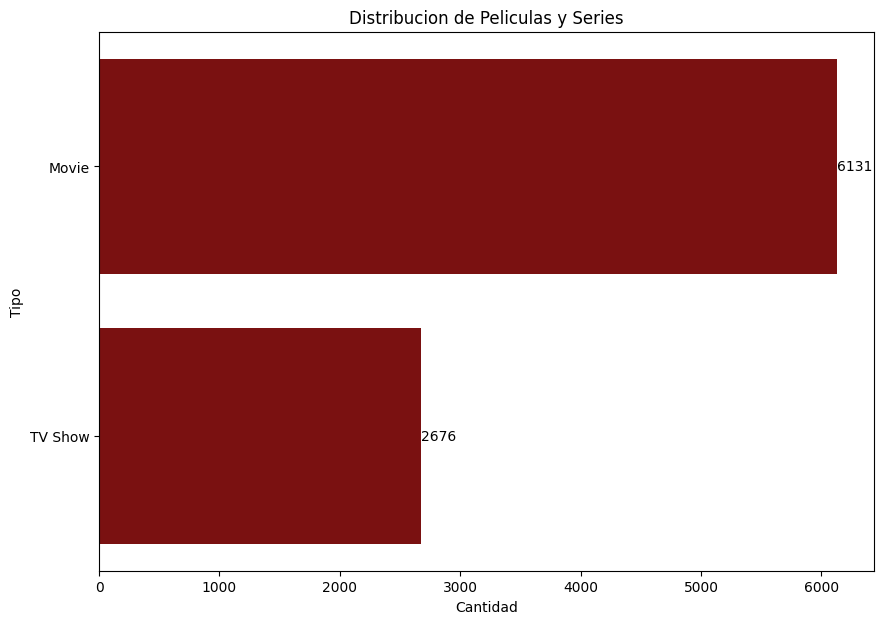

In [35]:
type_counts = ds['type'].value_counts()
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=type_counts.values, y=type_counts.index, orient='h', color='darkred')
ax.bar_label(ax.containers[0], fontsize=10);
plt.xlabel('Cantidad')
plt.ylabel('Tipo')
plt.title('Distribucion de Peliculas y Series')
plt.show()


<Figure size 1000x600 with 0 Axes>

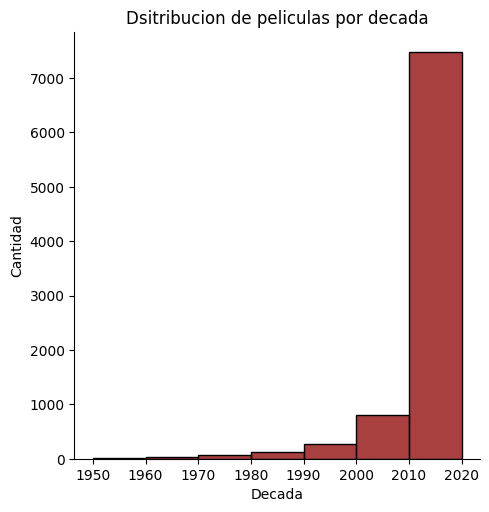

In [60]:
ds_decada = pd.DataFrame(ds.release_year)
ds_decada['Decada'] = ds_decada['release_year'] // 10 * 10
plt.figure(figsize=(10, 6))
ax = sns.displot(ds_decada, x='Decada', bins=range(1950, 2030, 10), color='darkred')
plt.xlabel('Decada')
plt.ylabel('Cantidad')
plt.title('Dsitribucion de peliculas por decada')
plt.show()

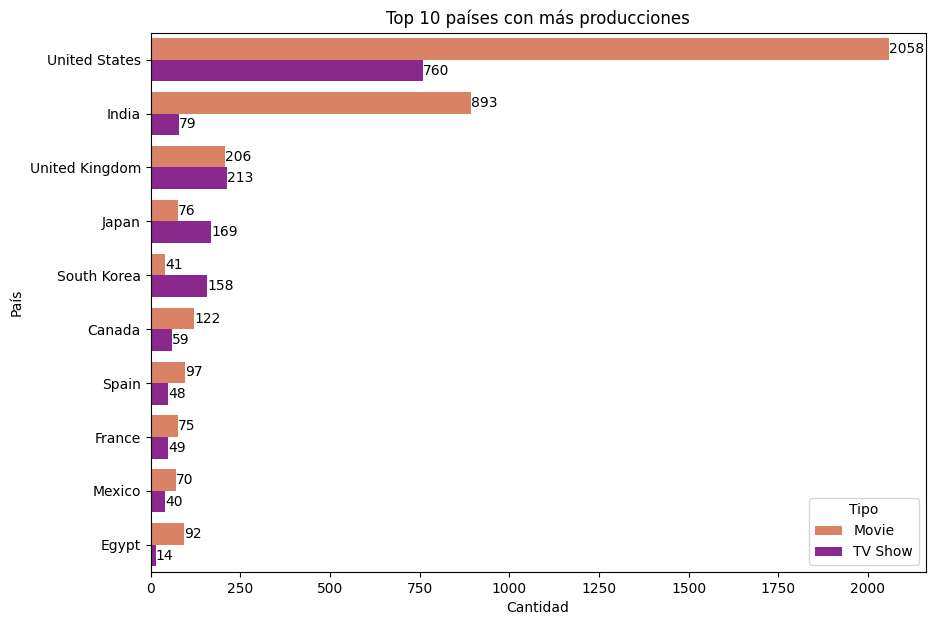

In [37]:
filtro = ds['country']!= 'Unknown'
ds_to_plot = ds[filtro]
top_ten = ds_to_plot['country'].value_counts().head(10)
ds_top_ten = ds_to_plot[ds_to_plot['country'].isin(top_ten.index)]
plt.figure(figsize=(10, 7))
ax = sns.countplot(data = ds_top_ten, y = 'country', hue = 'type', palette = 'plasma_r', order=ds_top_ten['country'].value_counts().index)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.title('Top 10 países con más producciones')
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.legend(title='Tipo')
plt.show()

In [38]:
ds_cantidad_pais = pd.DataFrame(columns=['Pais', 'Cantidad'])
paises = list(paises_prod.keys())
cantidad = list(paises_prod.values())
ds_cantidad_pais['Pais'] = paises
ds_cantidad_pais['Cantidad'] = cantidad
ds_cantidad_pais.head()


,Pais,Cantidad
0,United States,3689
1,South Africa,62
2,Unknown,831
3,India,1046
4,Ghana,5


In [39]:
ds_cantidad_pais['Pais'] = ds_cantidad_pais['Pais'].replace('United States', 'United States of America')
ds_cantidad_pais.head()


,Pais,Cantidad
0,United States of America,3689
1,South Africa,62
2,Unknown,831
3,India,1046
4,Ghana,5


In [40]:
!pip install geopandas plotly_express

In [41]:
import plotly.express as px
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.rename(columns={'name': 'Pais'}, inplace=True)

ds_geo = world.merge(ds_cantidad_pais, on='Pais', how='left')

fig = px.choropleth(ds_geo, locations='iso_a3', color='Cantidad',
                    hover_name='Pais', color_continuous_scale='plasma_r',
                    projection='natural earth', title='Cantidad de producciones por país')
fig.show()


<ipython-input-41-8671039674d9>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [42]:
ds_geo.head()

,pop_est,continent,Pais,iso_a3,gdp_md_est,geometry,Cantidad
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",445.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",3689.0


<Figure size 1000x600 with 0 Axes>

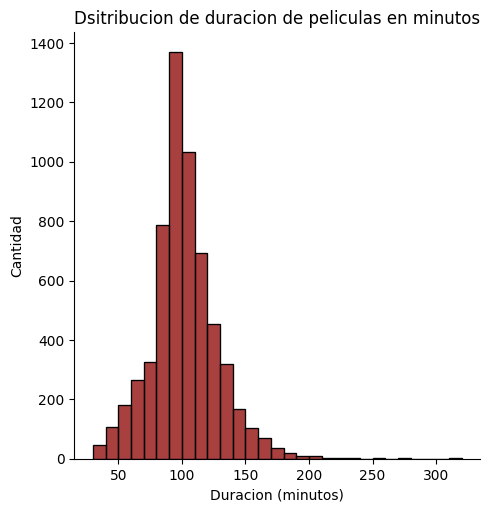

In [43]:
ds_duracion_peliculas = pd.DataFrame(ds[['type', 'duration']])
ds_duracion_peliculas = ds_duracion_peliculas[ds_duracion_peliculas['type'] == 'Movie']
ds_duracion_peliculas['duration'] = ds_duracion_peliculas['duration'].str.replace(' min', '')
ds_duracion_peliculas['Dec_min'] = (ds_duracion_peliculas['duration'].astype(int)) // 10 * 10
plt.figure(figsize=(10, 6))
sns.displot(ds_duracion_peliculas, x='Dec_min', bins=range(30, 330, 10), color='darkred')
plt.xlabel('Duracion (minutos)')
plt.ylabel('Cantidad')
plt.title('Dsitribucion de duracion de peliculas en minutos')
plt.show()

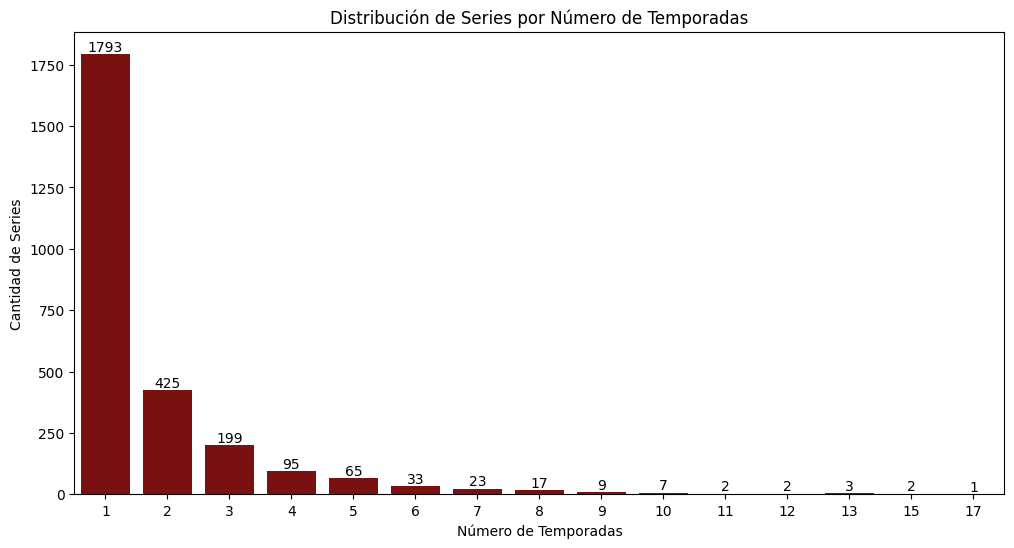

In [44]:
ds_duracion_series = pd.DataFrame(ds[['type', 'duration']])
ds_duracion_series = ds_duracion_series[ds_duracion_series['type'] == 'TV Show']
ds_duracion_series['duration'] = ds_duracion_series['duration'].str.replace(' Seasons', '')
ds_duracion_series['duration'] = ds_duracion_series['duration'].str.replace(' Season', '')
ds_duracion_series['seasons'] = ds_duracion_series['duration'].astype(int)

temp_counts = ds_duracion_series['seasons'].value_counts().sort_index()
temp_counts_ds = temp_counts.reset_index()
temp_counts_ds.columns = ['seasons', 'count']
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=temp_counts_ds, x='seasons', y='count', color='darkred')
ax.bar_label(ax.containers[0], fontsize=10);
plt.xlabel('Número de Temporadas')
plt.ylabel('Cantidad de Series')
plt.title('Distribución de Series por Número de Temporadas')
plt.show()

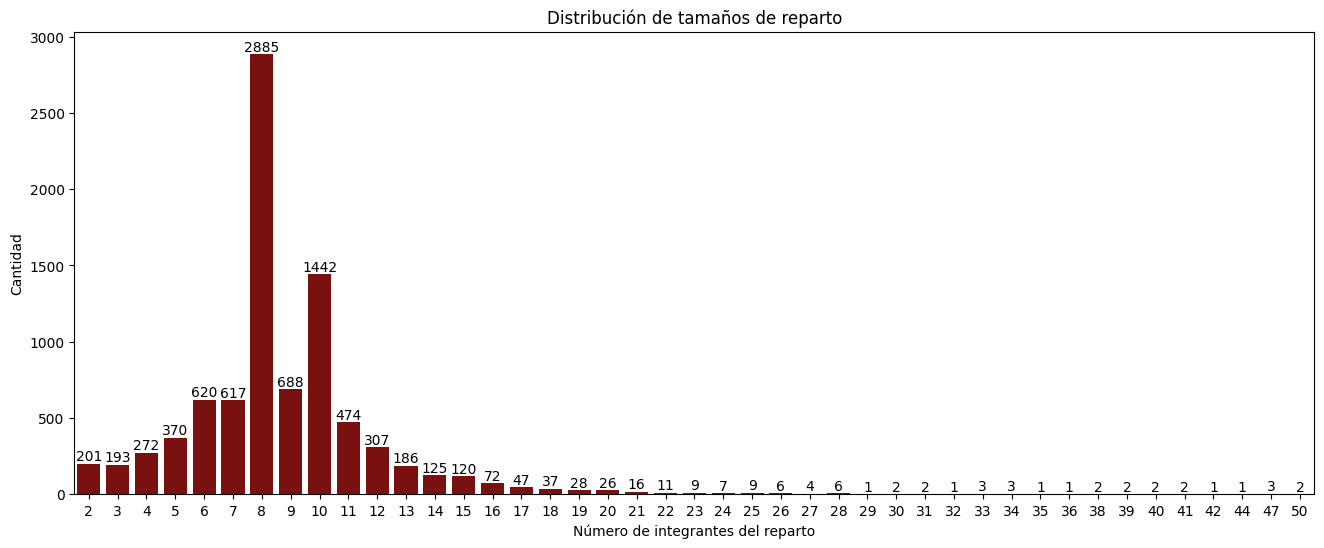

In [46]:
cast_counts = ds['cast_count'].value_counts().sort_index()
cast_counts_ds = cast_counts.reset_index()
cast_counts_ds.columns = ['cast', 'count']
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=cast_counts_ds, x='cast', y='count', color='darkred')
ax.bar_label(ax.containers[0], fontsize=10);
plt.xlabel('Número de integrantes del reparto')
plt.ylabel('Cantidad')
plt.title('Distribución de tamaños de reparto')
plt.show()

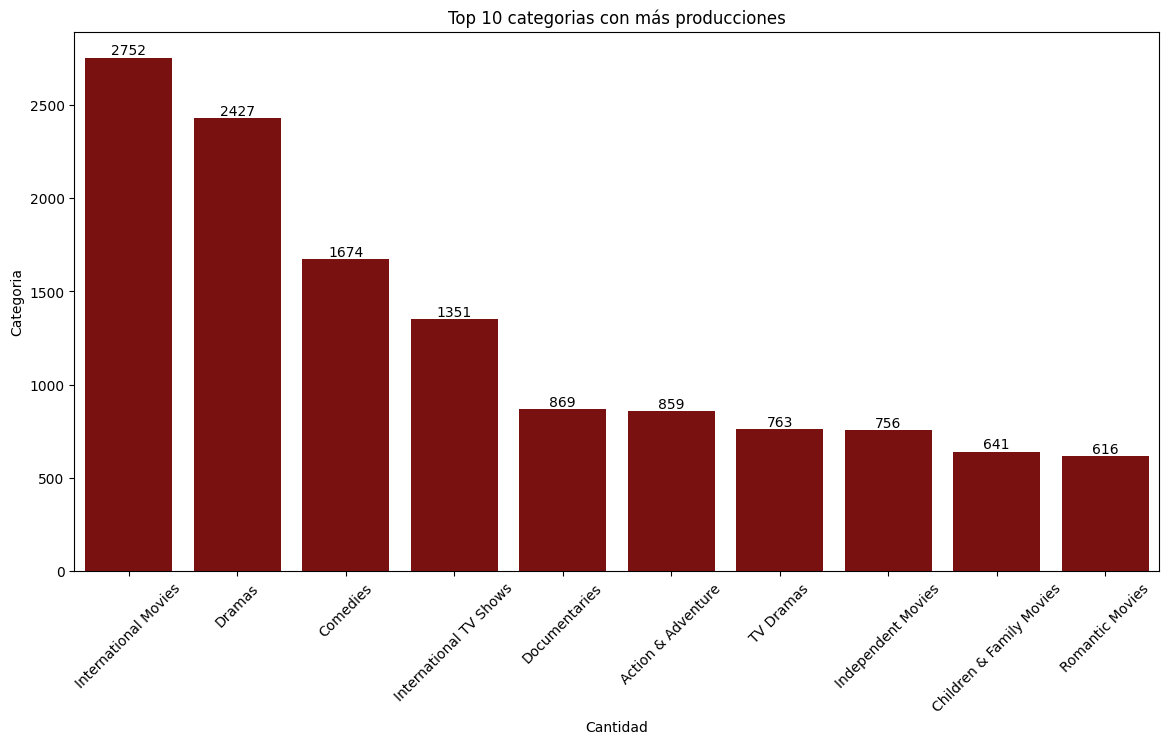

In [54]:
categorias_ds = pd.DataFrame(columns=['categoria','cantidad'])
for categoria, cantidad in categorias.items():
  categorias_ds = pd.concat([categorias_ds, pd.DataFrame({'categoria': [categoria], 'cantidad': [cantidad]})], ignore_index=True)

categorias_ds.sort_values(by='cantidad', ascending=False, inplace=True)

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=categorias_ds.head(10), x='categoria', y='cantidad', color='darkred')

ax.bar_label(ax.containers[0], fontsize=10);

plt.title('Top 10 categorias con más producciones')
plt.xlabel('Cantidad')
plt.ylabel('Categoria')
plt.xticks(rotation=45)
plt.show()


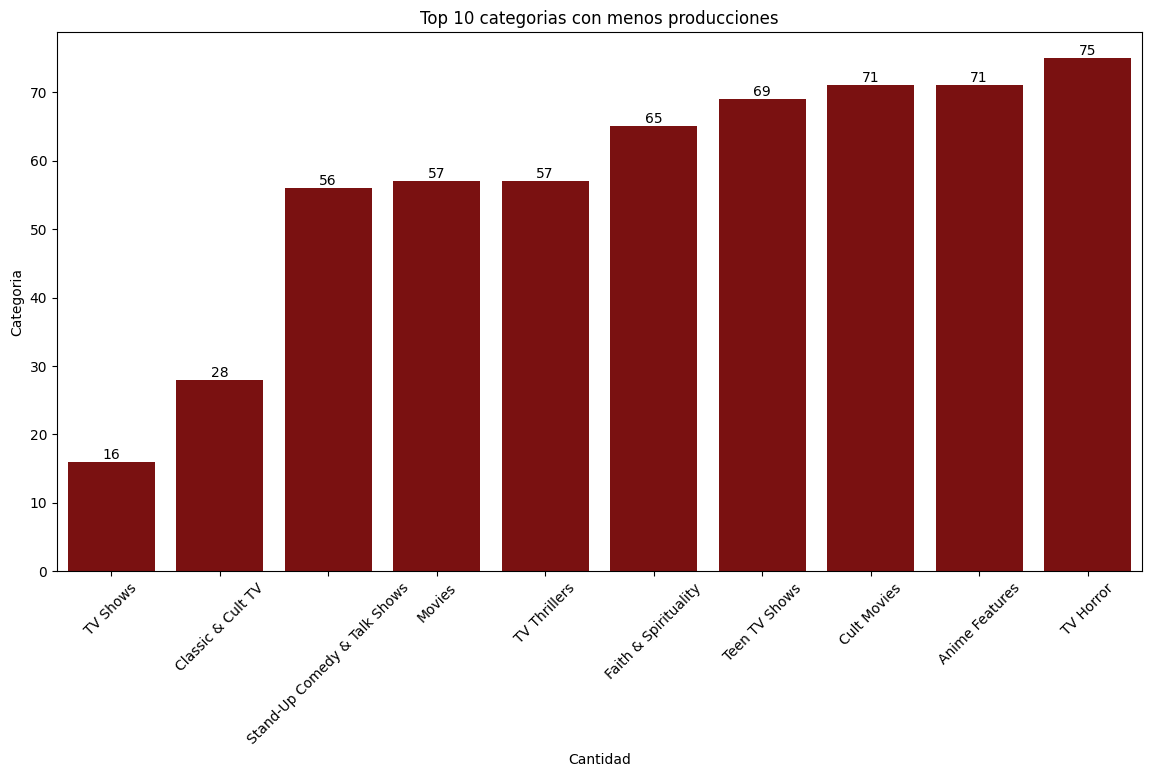

In [55]:
categorias_ds = pd.DataFrame(columns=['categoria','cantidad'])
for categoria, cantidad in categorias.items():
  categorias_ds = pd.concat([categorias_ds, pd.DataFrame({'categoria': [categoria], 'cantidad': [cantidad]})], ignore_index=True)

categorias_ds.sort_values(by='cantidad', ascending=True, inplace=True)

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=categorias_ds.head(10), x='categoria', y='cantidad', color='darkred')

ax.bar_label(ax.containers[0], fontsize=10);

plt.title('Top 10 categorias con menos producciones')
plt.xlabel('Cantidad')
plt.ylabel('Categoria')
plt.xticks(rotation=45)
plt.show()

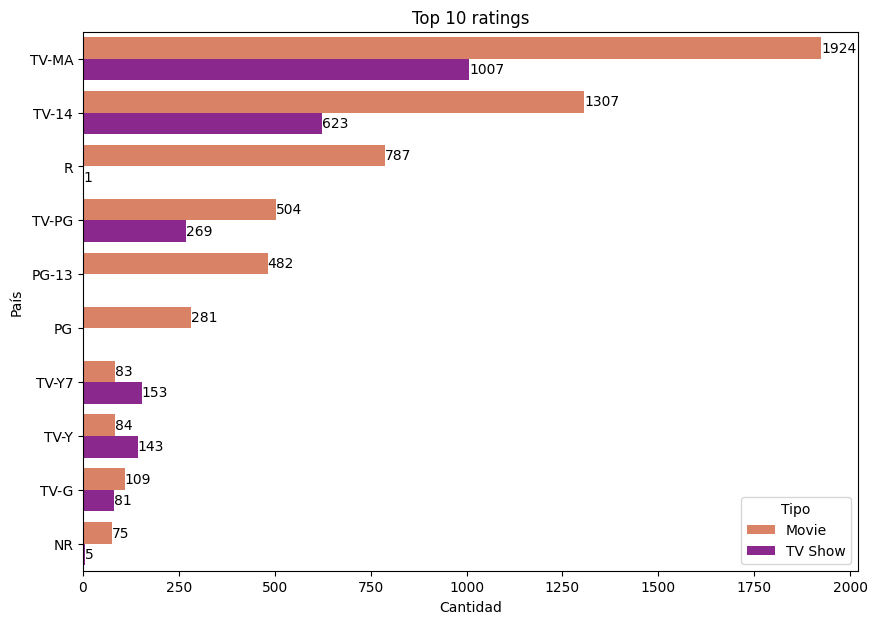

In [56]:
top_ten = ds['rating'].value_counts().head(10)
ds_top_ten = ds_to_plot[ds_to_plot['rating'].isin(top_ten.index)]
plt.figure(figsize=(10, 7))
ax = sns.countplot(data = ds_top_ten, y = 'rating', hue = 'type', palette = 'plasma_r', order=ds_top_ten['rating'].value_counts().index)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.title('Top 10 ratings')
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.legend(title='Tipo')
plt.show()